
 

# PROJECT TITLE:“COVID 19 DATA ANALYSIS”







# Load dataset 
## https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv


In [209]:
import pandas as pd
import numpy as np
import itertools
import numpy as np

url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv'

df = (pd.read_csv(url,index_col=0))

# Print the first five rows

In [210]:
print(df.head())

     Admin2 Province_State Country_Region          Last_Update       Lat  \
FIPS                                                                       
NaN     NaN            NaN    Afghanistan  2021-01-02 05:22:33  33.93911   
NaN     NaN            NaN        Albania  2021-01-02 05:22:33  41.15330   
NaN     NaN            NaN        Algeria  2021-01-02 05:22:33  28.03390   
NaN     NaN            NaN        Andorra  2021-01-02 05:22:33  42.50630   
NaN     NaN            NaN         Angola  2021-01-02 05:22:33 -11.20270   

          Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
FIPS                                                                  
NaN   67.709953      51526    2191      41727      0.0  Afghanistan   
NaN   20.168300      58316    1181      33634  23501.0      Albania   
NaN    1.659600      99897    2762      67395  29740.0      Algeria   
NaN    1.521800       8117      84       7463    570.0      Andorra   
NaN   17.873900      17568     405      1

#  Find if a value is nan in 
# Admin2, Province_State, Country_Region,   Last_Update, Lat, Long_, Deaths,  Recovered, Active



## A)First way

In [211]:
print(df.info())
sum=print("the sum of missing values are: ",((3984-3270)+(3984-3811)+(3984-3897 )+(3984-3897)+(3984-3983)))


<class 'pandas.core.frame.DataFrame'>
Float64Index: 3984 entries, nan to nan
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Admin2               3270 non-null   object 
 1   Province_State       3811 non-null   object 
 2   Country_Region       3984 non-null   object 
 3   Last_Update          3984 non-null   object 
 4   Lat                  3897 non-null   float64
 5   Long_                3897 non-null   float64
 6   Confirmed            3984 non-null   int64  
 7   Deaths               3984 non-null   int64  
 8   Recovered            3984 non-null   int64  
 9   Active               3983 non-null   float64
 10  Combined_Key         3984 non-null   object 
 11  Incident_Rate        3895 non-null   float64
 12  Case_Fatality_Ratio  3940 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 435.8+ KB
None
the sum of missing values are:  1062


## B)Second way

In [212]:

p=0
for j in range(10):
    for i in range(df.shape[0]):
        if pd.isnull((df.iat[i, j])) :
            p=p+1
            
                
print("The sum of the missing values are: ",p)



The sum of the missing values are:  1062


## C)Third way

In [213]:
check_nan1 = df['Admin2'].isnull().values.sum()
check_nan2 = df['Province_State'].isnull().values.sum()
check_nan3 = df['Country_Region'].isnull().values.sum()
check_nan4 = df['Last_Update'].isnull().values.sum()
check_nan5 = df['Lat'].isnull().values.sum()
check_nan6 = df['Long_'].isnull().values.sum()
check_nan7 = df['Confirmed'].isnull().values.sum()
check_nan8 = df['Deaths'].isnull().values.sum()
check_nan9 = df['Recovered'].isnull().values.sum()
check_nan10 = df['Active'].isnull().values.sum()

sum=check_nan1+check_nan2+check_nan3+check_nan4+check_nan5+check_nan6+check_nan7+check_nan8+check_nan9+check_nan10
print("The sum of the missing values are: ",sum)

The sum of the missing values are:  1062


# Find and print the last number of Deaths, Active, Confirmed, Recovered
## Print the last row of all features

In [214]:
print(df.tail(1)) 

     Admin2 Province_State        Country_Region          Last_Update  \
FIPS                                                                    
NaN     NaN            NaN  Summer Olympics 2020  2021-01-02 05:22:33   

          Lat     Long_  Confirmed  Deaths  Recovered  Active  \
FIPS                                                            
NaN   35.6491  139.7737          0       0          0     0.0   

              Combined_Key  Incident_Rate  Case_Fatality_Ratio  
FIPS                                                            
NaN   Summer Olympics 2020            0.0                  0.0  


In [215]:
print(df.iloc[df.shape[0]-1])

Admin2                                  NaN
Province_State                          NaN
Country_Region         Summer Olympics 2020
Last_Update             2021-01-02 05:22:33
Lat                                 35.6491
Long_                               139.774
Confirmed                                 0
Deaths                                    0
Recovered                                 0
Active                                    0
Combined_Key           Summer Olympics 2020
Incident_Rate                             0
Case_Fatality_Ratio                       0
Name: nan, dtype: object


## Find the specific elements
### Find the index of deaths, confirmed, recovered , active

In [216]:
deaths_index=df.columns.get_loc("Deaths")
print("deaths index:",deaths_index)

confirmed_index=df.columns.get_loc("Confirmed")
print("confirmed_index:",confirmed_index)

Recovered_index=df.columns.get_loc("Recovered")
print("Recovered_index",Recovered_index)

Active_index=df.columns.get_loc("Active")
print("Active_index :", Active_index)

            

deaths index: 7
confirmed_index: 6
Recovered_index 8
Active_index : 9


### Print the last Deaths, confirmed, recovered, active

In [217]:
last_death=df.iat[len(df)-1,deaths_index]
print("last death:",last_death)

last_confirmed=df.iat[len(df)-1,confirmed_index]
print("last confirmed:",last_confirmed)

last_Recovered=df.iat[len(df)-1,Recovered_index]
print("last Recovered:",last_Recovered)

last_Active=df.iat[len(df)-1,Active_index]
print("last Active:",last_Active)

last death: 0
last confirmed: 0
last Recovered: 0
last Active: 0.0


# Compute and  Print the deaths sum per country

## Find the names that exist in Country region and create countries list

In [218]:
countries=[]
df['Country_Region'] = pd.Categorical(df['Country_Region'])
a=df['Country_Region'].cat.categories
for i in a:
    countries.append(i)
    

print("countries names: ", countries)
print("the length of the countries list is:", len(countries))

countries names:  ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland',

In [219]:
'''
countries=[]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(a)
le.classes_
for i in le.classes_:
    countries.append(i)
print(len(countries))
print(le.classes_)

'''

'\ncountries=[]\nfrom sklearn import preprocessing\nle = preprocessing.LabelEncoder()\nle.fit(a)\nle.classes_\nfor i in le.classes_:\n    countries.append(i)\nprint(len(countries))\nprint(le.classes_)\n\n'

# Create Deaths list and check if there is a negative or nan value

In [220]:
deaths_list=[]
deaths=df['Deaths']
for i in deaths:
    deaths_list.append(i)


print(deaths_list)    
print(len(deaths_list))


for i in range(len(deaths_list)):
    
    if pd.isnull(deaths_list[i]):
        print("null",i)
        deaths_list[i]=0
    if deaths_list[i]<0:
        #Recovered_list[i]=0
        print("negative",deaths_list[i])
        print("negative position",i)
        deaths_list[i]=0

[2191, 1181, 2762, 84, 405, 5, 43319, 2828, 3, 54, 0, 6, 4, 13, 820, 9, 6261, 2670, 171, 352, 7576, 7, 1433, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19581, 0, 0, 248, 44, 0, 9175, 4086, 42, 796, 2496, 926, 5295, 9159, 9993, 4263, 5087, 6805, 4506, 4467, 2347, 12001, 7199, 3680, 7993, 9666, 2840, 2993, 8917, 25600, 1822, 787, 5270, 46775, 2492, 1236, 3, 7604, 85, 2697, 2, 113, 0, 448, 1046, 901, 1, 0, 667, 9, 4, 0, 65, 1, 4568, 0, 8388, 0, 155, 1, 63, 104, 585, 311, 225, 113, 15, 802, 299, 263, 93, 233, 556, 10813, 218, 588, 287, 1, 1258, 6, 9, 6, 1, 2, 8, 2, 2, 6, 6, 13, 22, 148, 4512, 4, 1, 0, 1, 2, 2, 0, 0, 0, 3, 7, 7, 0, 3, 3, 0, 3, 2, 1, 125, 4817, 134, 3443, 1107, 620, 644, 9868, 533, 182, 505, 996, 169, 1679, 1726, 20, 37, 1130, 545, 1075, 745, 987, 2022, 245, 659, 760, 39, 2405, 679, 1276, 0, 4297, 12, 14, 10, 108, 591, 2185, 138, 3961, 146, 127, 11711, 0, 0, 1322, 13, 61, 0, 2416, 14051, 7687, 1327, 86, 3, 234, 216, 1937, 2, 561, 71, 114, 155, 43, 55, 0, 42, 1, 0, 12, 64399, 64, 124, 2528, 

# Create dataset_Countries list

In [221]:
dataset_countries=[]
for i in range(len(df)):
    dataset_countries.append(df.iat[i,2])
print("dataset_countries:",dataset_countries)






dataset_countries: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', '

# Combine dataset_countries list and deaths list and make the Countries_deaths_list

In [222]:
countries_deaths=[]
a=list(zip((dataset_countries), (deaths_list)))

for i in a:
    countries_deaths.append(i)
print(countries_deaths)

print("the length of the zipped list is:", len(a))
print("the length of the death list is:",len(deaths_list))
print("the length of the dataset countries is",len(dataset_countries))
print("countries_deaths", countries_deaths)



[('Afghanistan', 2191), ('Albania', 1181), ('Algeria', 2762), ('Andorra', 84), ('Angola', 405), ('Antigua and Barbuda', 5), ('Argentina', 43319), ('Armenia', 2828), ('Australia', 3), ('Australia', 54), ('Australia', 0), ('Australia', 6), ('Australia', 4), ('Australia', 13), ('Australia', 820), ('Australia', 9), ('Austria', 6261), ('Azerbaijan', 2670), ('Bahamas', 171), ('Bahrain', 352), ('Bangladesh', 7576), ('Barbados', 7), ('Belarus', 1433), ('Belgium', 0), ('Belgium', 0), ('Belgium', 0), ('Belgium', 0), ('Belgium', 0), ('Belgium', 0), ('Belgium', 0), ('Belgium', 0), ('Belgium', 0), ('Belgium', 19581), ('Belgium', 0), ('Belgium', 0), ('Belize', 248), ('Benin', 44), ('Bhutan', 0), ('Bolivia', 9175), ('Bosnia and Herzegovina', 4086), ('Botswana', 42), ('Brazil', 796), ('Brazil', 2496), ('Brazil', 926), ('Brazil', 5295), ('Brazil', 9159), ('Brazil', 9993), ('Brazil', 4263), ('Brazil', 5087), ('Brazil', 6805), ('Brazil', 4506), ('Brazil', 4467), ('Brazil', 2347), ('Brazil', 12001), ('Bra

## For each country name in the country_list, search the the name in the zipped_list and if the name is the same, sum deaths for each country and append it to Sums_per_country_list.

## Combine countries and sums_per_countries_list and make the final_deaths_per_country_list

In [223]:
s=[]

sums_per_country=[]
transposed_sums_per_country=[]

for i in range(len(countries)):
    sums_per_country.append(s)
    s=0
    for j in range (len(countries_deaths)):
        
        if countries[i]==countries_deaths[j][0]:
            
            s=s+(countries_deaths[j][1])
sums_per_country.append(s)
print("deaths_sums_per_country length is",len(sums_per_country))
print("countries",len(countries))
print(sums_per_country)

sums_per_country.pop(0)
print("deaths_sums_per_country length is",len(sums_per_country))
print("countries",len(countries))
print(sums_per_country)
final_deaths_per_country_list=list(zip((countries), (sums_per_country)))


            
    
            

            
    


deaths_sums_per_country length is 195
countries 194
[[], 2191, 1181, 2762, 84, 405, 5, 43319, 2828, 909, 6261, 2670, 171, 352, 7576, 7, 1433, 19581, 248, 44, 0, 9175, 4086, 42, 195411, 3, 7604, 85, 2697, 2, 113, 0, 448, 15806, 63, 104, 16660, 4782, 43495, 10, 108, 591, 2185, 138, 3961, 146, 127, 11711, 1322, 13, 61, 0, 2416, 14051, 7687, 1327, 86, 3, 234, 216, 1937, 2, 561, 64892, 64, 124, 2528, 34145, 335, 4881, 0, 4820, 81, 45, 164, 236, 0, 3160, 9667, 29, 149474, 22329, 55337, 12824, 2248, 3356, 74621, 303, 3540, 3851, 2765, 1681, 0, 942, 1336, 936, 1356, 0, 644, 1479, 51, 83, 1487, 39, 1837, 495, 2, 261, 191, 474, 48, 271, 219, 0, 349, 10, 126507, 3004, 3, 1, 684, 7425, 167, 208, 1864, 11624, 25, 165, 106, 1294, 2510, 436, 1499, 10258, 0, 4064, 9, 2262, 93231, 9248, 28956, 6972, 245, 15841, 56798, 94, 0, 5, 0, 0, 59, 17, 6230, 410, 3250, 0, 76, 29, 2250, 2728, 0, 130, 28887, 63, 50837, 208, 1468, 0, 123, 8727, 7704, 717, 7, 90, 21, 64, 0, 68, 127, 4730, 21093, 354299, 265, 19437, 6

#  Print the final_deaths_per_country_list

In [224]:
print("final_deaths_per_country_list",(final_deaths_per_country_list))

final_deaths_per_country_list [('Afghanistan', 2191), ('Albania', 1181), ('Algeria', 2762), ('Andorra', 84), ('Angola', 405), ('Antigua and Barbuda', 5), ('Argentina', 43319), ('Armenia', 2828), ('Australia', 909), ('Austria', 6261), ('Azerbaijan', 2670), ('Bahamas', 171), ('Bahrain', 352), ('Bangladesh', 7576), ('Barbados', 7), ('Belarus', 1433), ('Belgium', 19581), ('Belize', 248), ('Benin', 44), ('Bhutan', 0), ('Bolivia', 9175), ('Bosnia and Herzegovina', 4086), ('Botswana', 42), ('Brazil', 195411), ('Brunei', 3), ('Bulgaria', 7604), ('Burkina Faso', 85), ('Burma', 2697), ('Burundi', 2), ('Cabo Verde', 113), ('Cambodia', 0), ('Cameroon', 448), ('Canada', 15806), ('Central African Republic', 63), ('Chad', 104), ('Chile', 16660), ('China', 4782), ('Colombia', 43495), ('Comoros', 10), ('Congo (Brazzaville)', 108), ('Congo (Kinshasa)', 591), ('Costa Rica', 2185), ("Cote d'Ivoire", 138), ('Croatia', 3961), ('Cuba', 146), ('Cyprus', 127), ('Czechia', 11711), ('Denmark', 1322), ('Diamond P

# Create the confirmed_list and check if there is a negative or nan value

In [225]:
Confirmed_list=[]
Confirmed=df['Confirmed']
for i in Confirmed:
    Confirmed_list.append(i)


print("the confirmed list is:",Confirmed_list)    
print("the length of the confirmed list is:",len(Confirmed_list))

for i in range(len(Confirmed_list)):
    
    if pd.isnull(Confirmed_list[i]):
        print("null",i)
        Confirmed_list[i]=0
    if Confirmed_list[i]<0:
        #Recovered_list[i]=0
        print("negative",Confirmed_list[i])
        print("negative position",i)
        Confirmed_list[i]=0
        
for i in range(len(Confirmed_list)):
    if pd.isnull(Confirmed_list[i]):
        print("null",i)
        
    if Confirmed_list[i]<0:
        
        print("negative",Confirmed_list[i])
        print("negative position",i)


the confirmed list is: [51526, 58316, 99897, 8117, 17568, 159, 1629594, 159738, 118, 4947, 75, 1255, 580, 234, 20388, 863, 362911, 219041, 7887, 92913, 514500, 395, 196223, 79680, 81557, 65260, 49270, 102209, 97027, 29349, 18416, 35462, 10701, 25144, 54214, 10776, 3251, 689, 160985, 112143, 14805, 41689, 105091, 68361, 201574, 494684, 335992, 252077, 249260, 309112, 200959, 179704, 134750, 546884, 293802, 167062, 418323, 222993, 143179, 118353, 451912, 435390, 95999, 68710, 494447, 1466191, 113544, 90536, 157, 202540, 6828, 125042, 822, 11872, 379, 26848, 100428, 51990, 0, 13, 24700, 601, 390, 24, 1486, 266, 187344, 94, 208390, 13, 15350, 60, 4963, 2141, 23887, 23161, 10859, 8520, 1588, 47898, 14308, 26170, 9004, 17010, 25783, 319937, 10821, 21682, 15896, 58, 35982, 993, 988, 590, 513, 182, 2046, 264, 147, 171, 373, 964, 1299, 8888, 68149, 1021, 364, 684, 935, 157, 359, 46, 75, 18, 508, 863, 1520, 224, 853, 312, 1, 980, 230, 1306, 3249, 263708, 4600, 94549, 52000, 28803, 32668, 475253,

# Create the recovered_list and check if there is a negative or nan value

In [226]:
Recovered_list=[]
Recovered=df['Recovered']
for i in Recovered:
    Recovered_list.append(i)


print("the recovered list is:",Recovered_list)    
print("the length of the recovered list is:",len(Recovered_list))

for i in range(len(Recovered_list)):
    
    if pd.isnull(Recovered_list[i]):
        print("null",i)
        Recovered_list[i]=0
    if Recovered_list[i]<0:
        #Recovered_list[i]=0
        print("negative",Recovered_list[i])
        print("negative position",i)
        Recovered_list[i]=0

for i in range(len(Recovered_list)):
    if pd.isnull(Recovered_list[i]):
        print("null",i)
        
    if Recovered_list[i]<0:
        #Active_list[i]=0
        print("negative",Recovered_list[i])
        print("negative position",i)


the recovered list is: [41727, 33634, 67395, 7463, 11146, 148, 1426676, 143355, 114, 0, 71, 1224, 566, 221, 19539, 838, 334901, 188280, 6239, 90369, 458656, 319, 178102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9795, 3061, 449, 132510, 77682, 12136, 33670, 99710, 52670, 170178, 478198, 269846, 241952, 227931, 298401, 190884, 170171, 117816, 494278, 275483, 127030, 305194, 189850, 139971, 68394, 424406, 397324, 81122, 65405, 467020, 1287986, 99824, 80658, 149, 120343, 5152, 107777, 687, 11569, 362, 24892, 84827, 42127, 0, 13, 19528, 567, 366, 24, 1399, 262, 162622, 89, 170045, 13, 12496, 59, 1924, 1704, 22670, 21736, 10408, 8328, 1436, 44427, 13731, 24352, 8239, 16264, 23574, 304802, 9979, 20563, 14924, 44, 33726, 986, 944, 584, 488, 180, 2011, 261, 145, 165, 367, 942, 1270, 7912, 63637, 1016, 340, 682, 934, 155, 287, 46, 75, 18, 490, 847, 1420, 221, 822, 300, 1, 977, 215, 1293, 3102, 245839, 4300, 87898, 49335, 26406, 30213, 430079, 13707, 8169, 16984, 30947, 4613, 27564, 62249, 1204, 1907,

# Create the active_list and replace the nan value and the negative value with zero 

In [227]:
Active_list=[]
Active=df['Active']
for i in Active:
    Active_list.append(i)

for i in range(len(Active_list)):
    if pd.isnull(Active_list[i]):
        print("null",i)
        Active_list[i]=0
    if Active_list[i]<0:
        #Active_list[i]=0
        print("negative",Active_list[i])
        print("negative position",i)
        Active_list[i]=0
print(Active_list[0])
print("the Active list is:", Active_list)    
print("the length of the active list is",len(Active_list))

for i in range(len(Active_list)):
    if pd.isnull(Active_list[i]):
        print("null",i)
        
    if Active_list[i]<0:
        #Active_list[i]=0
        print("negative",Active_list[i])
        print("negative position",i)
        


negative -8880.0
negative position 32
null 78
negative -1083768.0
negative position 415
negative -951318.0
negative position 486
negative -355.0
negative position 1446
negative -94.0
negative position 1657
negative -55.0
negative position 1891
negative -154.0
negative position 2559
negative -55.0
negative position 2577
0.0
the Active list is: [0.0, 23501.0, 29740.0, 570.0, 6017.0, 6.0, 159599.0, 13555.0, 1.0, 1696.0, 4.0, 25.0, 10.0, 0.0, 29.0, 16.0, 21749.0, 28091.0, 1477.0, 2192.0, 48268.0, 69.0, 16688.0, 79680.0, 81557.0, 65260.0, 49270.0, 102209.0, 97027.0, 29349.0, 18416.0, 35462.0, 0, 25144.0, 54214.0, 733.0, 146.0, 240.0, 19300.0, 30375.0, 2627.0, 7223.0, 2885.0, 14765.0, 26101.0, 7327.0, 56153.0, 5862.0, 16242.0, 3906.0, 5569.0, 5066.0, 14587.0, 40605.0, 11120.0, 36352.0, 105136.0, 23477.0, 368.0, 46966.0, 18589.0, 12466.0, 13055.0, 2518.0, 22157.0, 131430.0, 11228.0, 8642.0, 5.0, 74593.0, 1591.0, 14568.0, 133.0, 190.0, 17.0, 1508.0, 14555.0, 8962.0, 0, 0.0, 4505.0, 25.0, 20.0,

# Print the confirmed_per_dataset_country, recovered_per_dataset_country, active_per_dataset_country

In [228]:
countries_active=[]
countries_recovered=[]
countries_confirmed=[]

b=list(zip((dataset_countries), (Confirmed_list)))
for i in b:
    countries_confirmed.append(i)
print("countries_dataset_confirmed_zipped",countries_confirmed)



c=list(zip((dataset_countries), (Recovered_list)))
for i in c:
    countries_recovered.append(i)
print("countries_dataset_recovered_zipped",countries_recovered)




d=list(zip((dataset_countries), (Active_list)))
for i in d:
    countries_active.append(i)
print("countries_dataset_active_zipped",countries_active)

print("countries_dataset_deaths_zipped",len(a))
print("countries_dataset_confirmed_zipped",len(b))
print("countries_dataset_recovered_zipped",len(c))
print("countries_dataset_active_zipped",len(d))

countries_dataset_confirmed_zipped [('Afghanistan', 51526), ('Albania', 58316), ('Algeria', 99897), ('Andorra', 8117), ('Angola', 17568), ('Antigua and Barbuda', 159), ('Argentina', 1629594), ('Armenia', 159738), ('Australia', 118), ('Australia', 4947), ('Australia', 75), ('Australia', 1255), ('Australia', 580), ('Australia', 234), ('Australia', 20388), ('Australia', 863), ('Austria', 362911), ('Azerbaijan', 219041), ('Bahamas', 7887), ('Bahrain', 92913), ('Bangladesh', 514500), ('Barbados', 395), ('Belarus', 196223), ('Belgium', 79680), ('Belgium', 81557), ('Belgium', 65260), ('Belgium', 49270), ('Belgium', 102209), ('Belgium', 97027), ('Belgium', 29349), ('Belgium', 18416), ('Belgium', 35462), ('Belgium', 10701), ('Belgium', 25144), ('Belgium', 54214), ('Belize', 10776), ('Benin', 3251), ('Bhutan', 689), ('Bolivia', 160985), ('Bosnia and Herzegovina', 112143), ('Botswana', 14805), ('Brazil', 41689), ('Brazil', 105091), ('Brazil', 68361), ('Brazil', 201574), ('Brazil', 494684), ('Braz

# Find which countries and the positions in the list, have deaths above 150

In [230]:
countries_above_150_deaths_positions=[]
countries_above_150_deaths=[]
for i in range(len(sums_per_country)):
    if sums_per_country[i]>150:
        countries_above_150_deaths_positions.append(i)
        print("i=",i)
      
        print("sums_per_country above 150 deaths",sums_per_country[i])
print("countries_above_150_deaths_positions_are: ",(countries_above_150_deaths_positions))
print("length_of_countries_above_150_deaths_positions: ",len(countries_above_150_deaths_positions))

for i in countries_above_150_deaths_positions:
    
    countries_above_150_deaths.append(countries[i])
print("countries_above_150_deaths",countries_above_150_deaths)
print(" the length of countries_above_150_deaths is",len(countries_above_150_deaths))





i= 0
sums_per_country above 150 deaths 2191
i= 1
sums_per_country above 150 deaths 1181
i= 2
sums_per_country above 150 deaths 2762
i= 4
sums_per_country above 150 deaths 405
i= 6
sums_per_country above 150 deaths 43319
i= 7
sums_per_country above 150 deaths 2828
i= 8
sums_per_country above 150 deaths 909
i= 9
sums_per_country above 150 deaths 6261
i= 10
sums_per_country above 150 deaths 2670
i= 11
sums_per_country above 150 deaths 171
i= 12
sums_per_country above 150 deaths 352
i= 13
sums_per_country above 150 deaths 7576
i= 15
sums_per_country above 150 deaths 1433
i= 16
sums_per_country above 150 deaths 19581
i= 17
sums_per_country above 150 deaths 248
i= 20
sums_per_country above 150 deaths 9175
i= 21
sums_per_country above 150 deaths 4086
i= 23
sums_per_country above 150 deaths 195411
i= 25
sums_per_country above 150 deaths 7604
i= 27
sums_per_country above 150 deaths 2697
i= 31
sums_per_country above 150 deaths 448
i= 32
sums_per_country above 150 deaths 15806
i= 35
sums_per_coun

# Find the confirmed per country that are above 150 deaths and plot bar diagram

confirmed_sums_per_country length is 195
countries 194
 length sums_per_country1 195
[51526, 58316, 99897, 8117, 17568, 159, 1629594, 159738, 28460, 362911, 219041, 7887, 92913, 514500, 395, 196223, 648289, 10776, 3251, 689, 160985, 112143, 14805, 7700578, 157, 202540, 6828, 125042, 822, 11872, 379, 26848, 591149, 4963, 2141, 612564, 96023, 1654880, 823, 7107, 17849, 169321, 22563, 212007, 12056, 22818, 732022, 166567, 712, 5840, 88, 172218, 213378, 139471, 46515, 5277, 1320, 28406, 9482, 124652, 49, 36403, 2697014, 9571, 3800, 228410, 1762637, 54930, 139447, 127, 138236, 13738, 2452, 6348, 10015, 27, 122974, 325278, 5754, 10325823, 751270, 1231429, 596193, 93532, 428510, 2129376, 12915, 239068, 295765, 202060, 96614, 0, 62593, 51502, 150869, 81156, 41, 41615, 183888, 3206, 1779, 100744, 2175, 145430, 46415, 9, 17714, 6684, 115078, 13804, 7203, 12909, 4, 14581, 527, 1437185, 145258, 885, 1242, 48589, 440970, 18794, 24545, 261019, 816616, 2162, 6046, 3403, 88587, 83743, 49803, 128867, 4

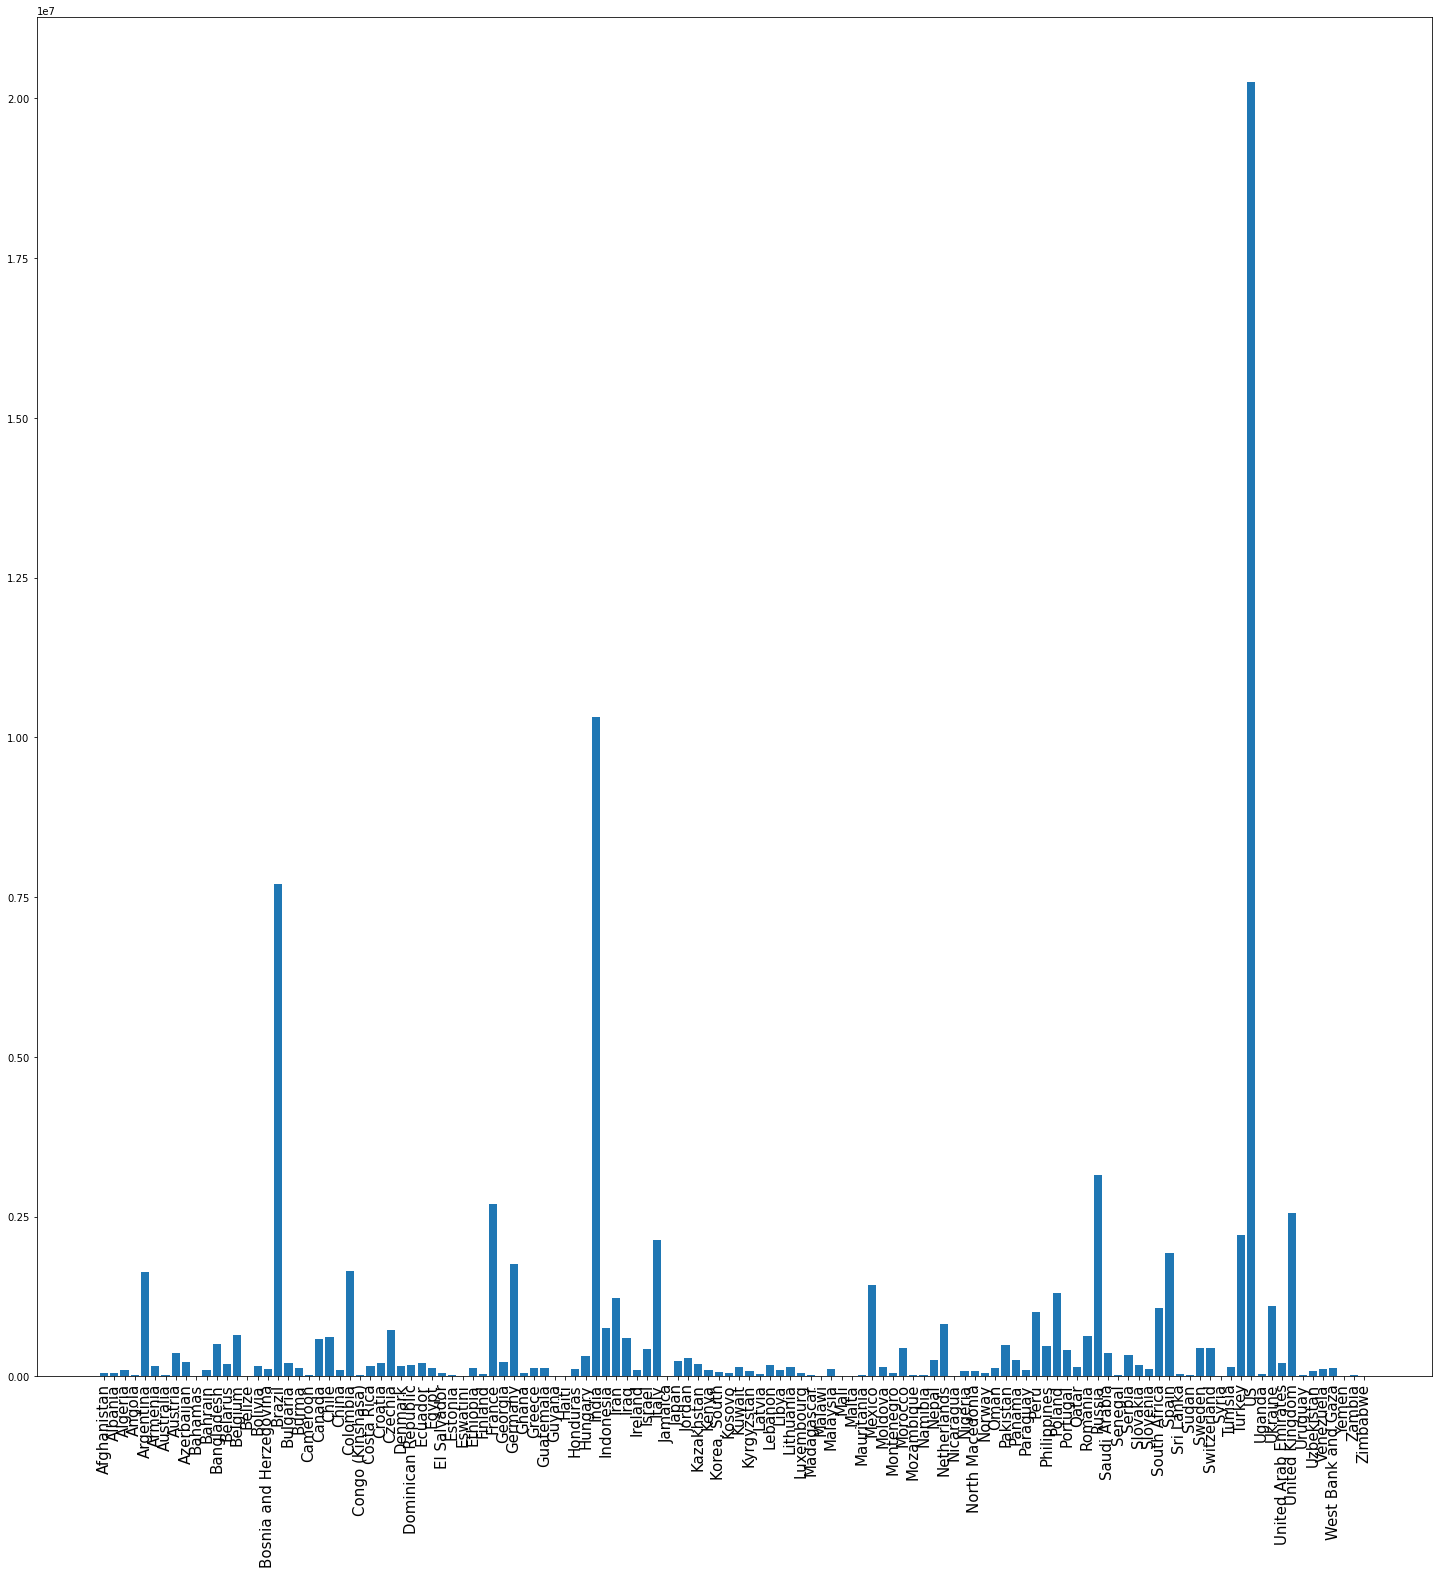

In [231]:
s1=[]

sums_per_country1=[]
transposed_sums_per_country1=[]

#print(countries_deaths[0])
#print(countries_deaths[0][0])
#print(countries_deaths[0][1])
for i in range(len(countries)):
    sums_per_country1.append(s1)
    s1=0
    for j in range (len(countries_confirmed)):
        
        if countries[i]==countries_confirmed[j][0]:
            
            s1=s1+(countries_confirmed[j][1])
sums_per_country1.append(s1)
print("confirmed_sums_per_country length is",len(sums_per_country1))
print("countries",len(countries))
print(" length sums_per_country1",len(sums_per_country1))

sums_per_country1.pop(0)
print(sums_per_country1)
final_confirmed_per_country_list1=list(zip((countries), (sums_per_country1)))

confirmed_countries_above_150_deaths_positions=[]
print("countries_above_150_deaths_positions",countries_above_150_deaths_positions)
for i in countries_above_150_deaths_positions:
    print(sums_per_country1[i])
    confirmed_countries_above_150_deaths_positions.append(sums_per_country1[i])
print("confirmed_countries_above_150_deaths_positions is: ",confirmed_countries_above_150_deaths_positions)

import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
plt.bar(range(len(countries_above_150_deaths)), confirmed_countries_above_150_deaths_positions)
plt.xticks(range(len(countries_above_150_deaths)), countries_above_150_deaths, rotation='vertical', fontsize='15')
          
plt.show()

# Find the actives per country that are above 150 deaths and plot bar diagram

active_sums_per_country length is 195
countries 194
[[], 0.0, 23501.0, 29740.0, 570.0, 6017.0, 6.0, 159599.0, 13555.0, 1781.0, 21749.0, 28091.0, 1477.0, 2192.0, 48268.0, 69.0, 16688.0, 637588.0, 733.0, 146.0, 240.0, 19300.0, 30375.0, 2627.0, 649795.0, 5.0, 74593.0, 1591.0, 14568.0, 133.0, 190.0, 17.0, 1508.0, 75320.0, 2976.0, 333.0, 16701.0, 1210.0, 90837.0, 108.0, 1153.0, 2557.0, 35213.0, 444.0, 8226.0, 1565.0, 20634.0, 120238.0, 33855.0, 0.0, 44.0, 5.0, 38259.0, 14820.0, 18958.0, 3505.0, 55.0, 641.0, 9145.0, 2193.0, 10464.0, 3.0, 6842.0, 2431300.0, 119.0, 7.0, 10890.0, 339748.0, 837.0, 40802.0, 20.0, 6810.0, 504.0, 10.0, 316.0, 1155.0, 12.0, 62878.0, 158548.0, 147.0, 254254.0, 111005.0, 180522.0, 43552.0, 67920.0, 45244.0, 574767.0, 2080.0, 42168.0, 20080.0, 22521.0, 16131.0, 0.0, 18073.0, 8312.0, 3156.0, 3652.0, 1.0, 11953.0, 54450.0, 1659.0, 290.0, 26005.0, 326.0, 71286.0, 4942.0, 0.0, 225.0, 785.0, 23433.0, 606.0, 2238.0, 1512.0, 0.0, 2580.0, 21.0, 1310678.0, 10553.0, 164.0, 386.0

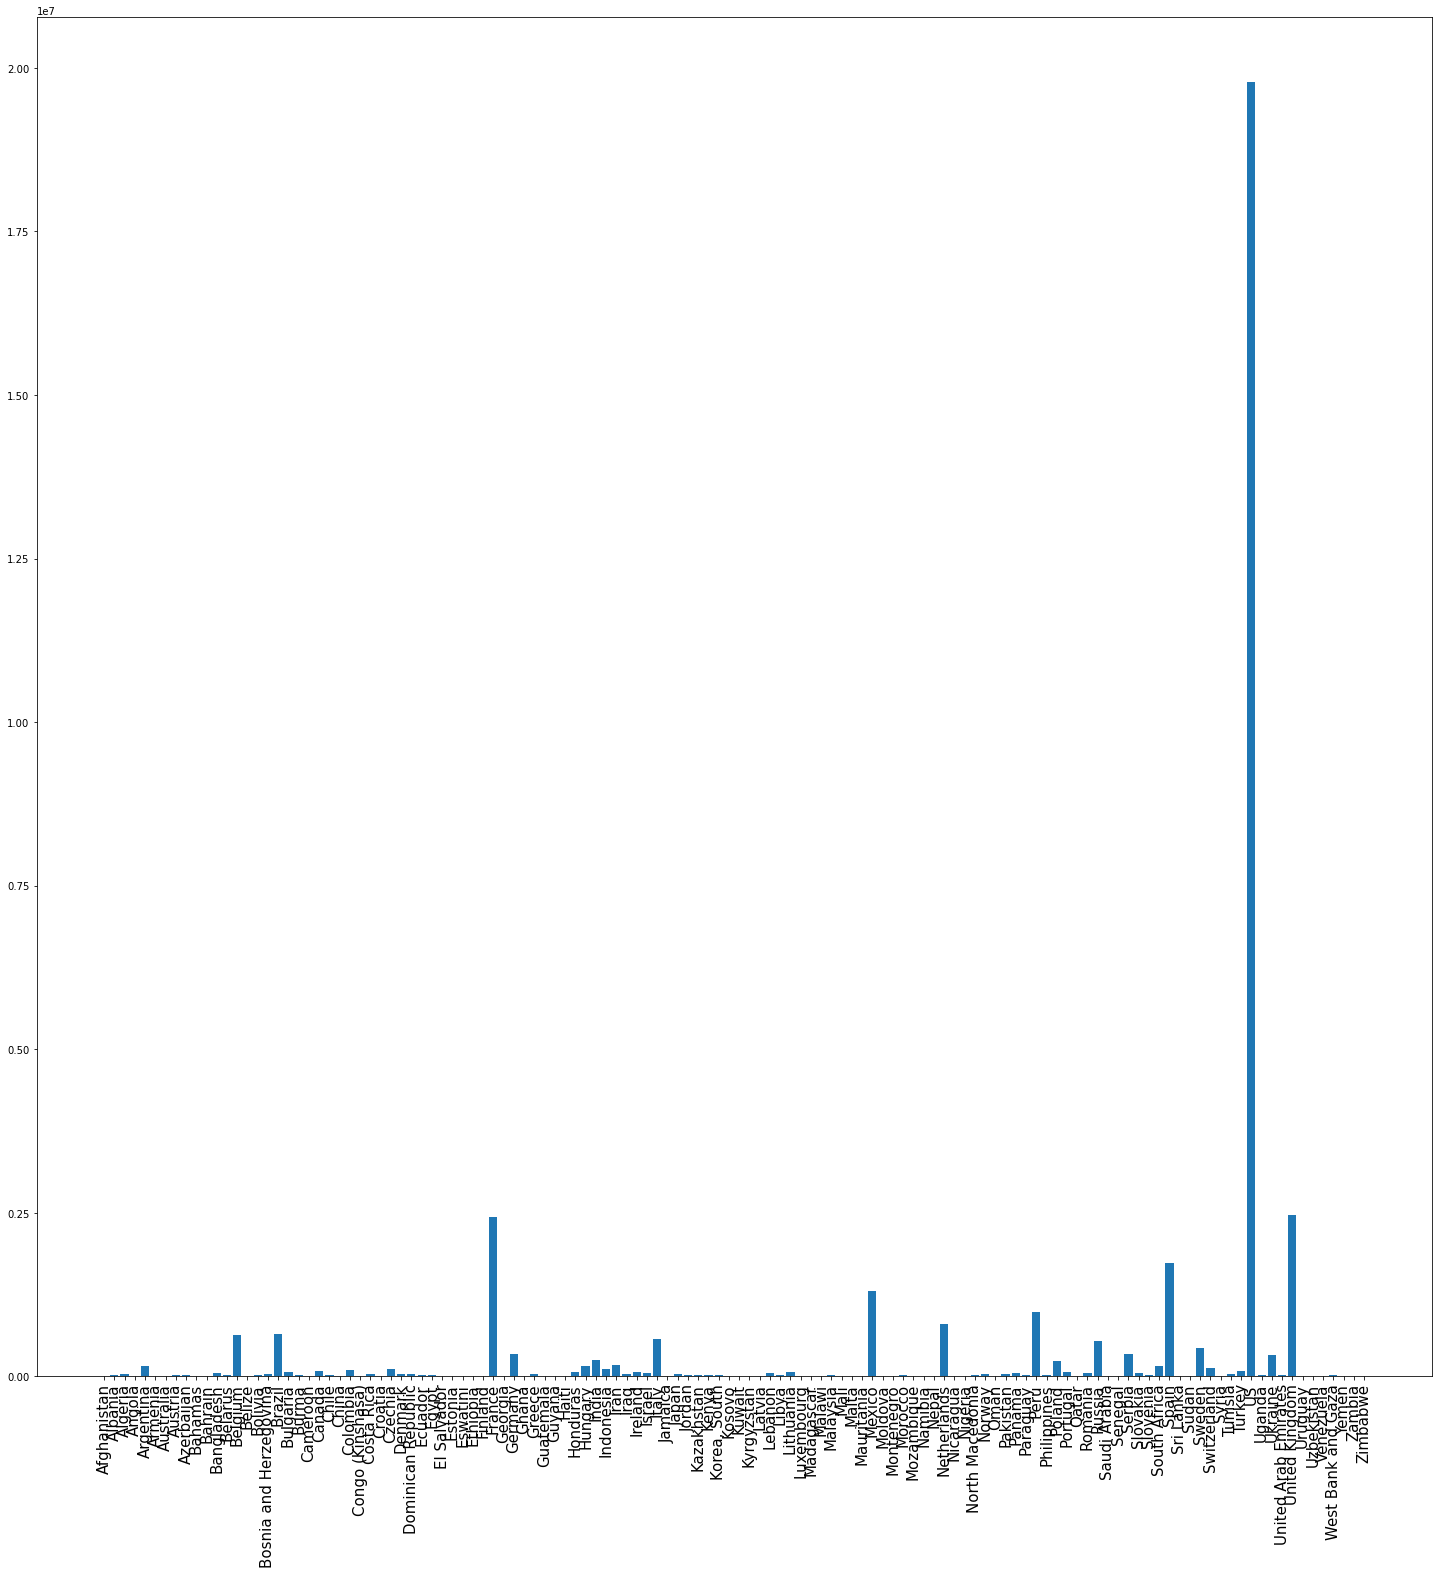

In [232]:
s2=[]

sums_per_country2=[]
transposed_sums_per_country2=[]

#print(countries_deaths[0])
#print(countries_deaths[0][0])
#print(countries_deaths[0][1])
for i in range(len(countries)):
    sums_per_country2.append(s2)
    s2=0
    for j in range (len(countries_active)):
        
        if countries[i]==countries_active[j][0]:
            
            s2=s2+(countries_active[j][1])
sums_per_country2.append(s2)
print("active_sums_per_country length is",len(sums_per_country2))
print("countries",len(countries))
print(sums_per_country2)

sums_per_country2.pop(0)
print("active_sums_per_country length is",len(sums_per_country2))
print(sums_per_country2)
final_active_per_country_list2=list(zip((countries), (sums_per_country2)))

active_countries_above_150_deaths_positions=[]
print("countries_above_150_deaths_positions",countries_above_150_deaths_positions)
for i in countries_above_150_deaths_positions:
    print(sums_per_country2[i])
    active_countries_above_150_deaths_positions.append(sums_per_country2[i])
print("active_countries_above_150_deaths_positions is: ",active_countries_above_150_deaths_positions)

import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
plt.bar(range(len(countries_above_150_deaths)), active_countries_above_150_deaths_positions)
plt.xticks(range(len(countries_above_150_deaths)), countries_above_150_deaths, rotation='vertical', fontsize='15')
          
plt.show()

# Find the recovered per country that are above 150 deaths and plot bar diagram

recovered_sums_per_country length is 195
countries 194
sums_per_country3_before pop [[], 41727, 33634, 67395, 7463, 11146, 148, 1426676, 143355, 22573, 334901, 188280, 6239, 90369, 458656, 319, 178102, 0, 9795, 3061, 449, 132510, 77682, 12136, 6855372, 149, 120343, 5152, 107777, 687, 11569, 362, 24892, 494437, 1924, 1704, 579203, 90031, 1520548, 705, 5846, 14701, 131923, 21981, 199820, 10345, 2057, 600073, 131390, 699, 5735, 83, 131543, 184507, 112826, 45960, 5136, 643, 19027, 7073, 112251, 44, 29000, 200822, 9388, 3669, 214992, 1388744, 53758, 93764, 107, 126606, 13153, 2397, 5868, 8624, 15, 56936, 157063, 5578, 9929568, 617936, 995570, 539817, 23364, 379910, 1479988, 10532, 193558, 271834, 176774, 78802, 0, 43578, 41854, 146777, 76148, 40, 29018, 127959, 1496, 1406, 73252, 1810, 98149, 40978, 7, 17228, 5708, 91171, 13150, 4694, 11178, 4, 11652, 496, 1083768, 131701, 718, 855, 38780, 409638, 16680, 20727, 253107, 9651, 2082, 4225, 1828, 74373, 61943, 17998, 121890, 438974, 0, 197928, 

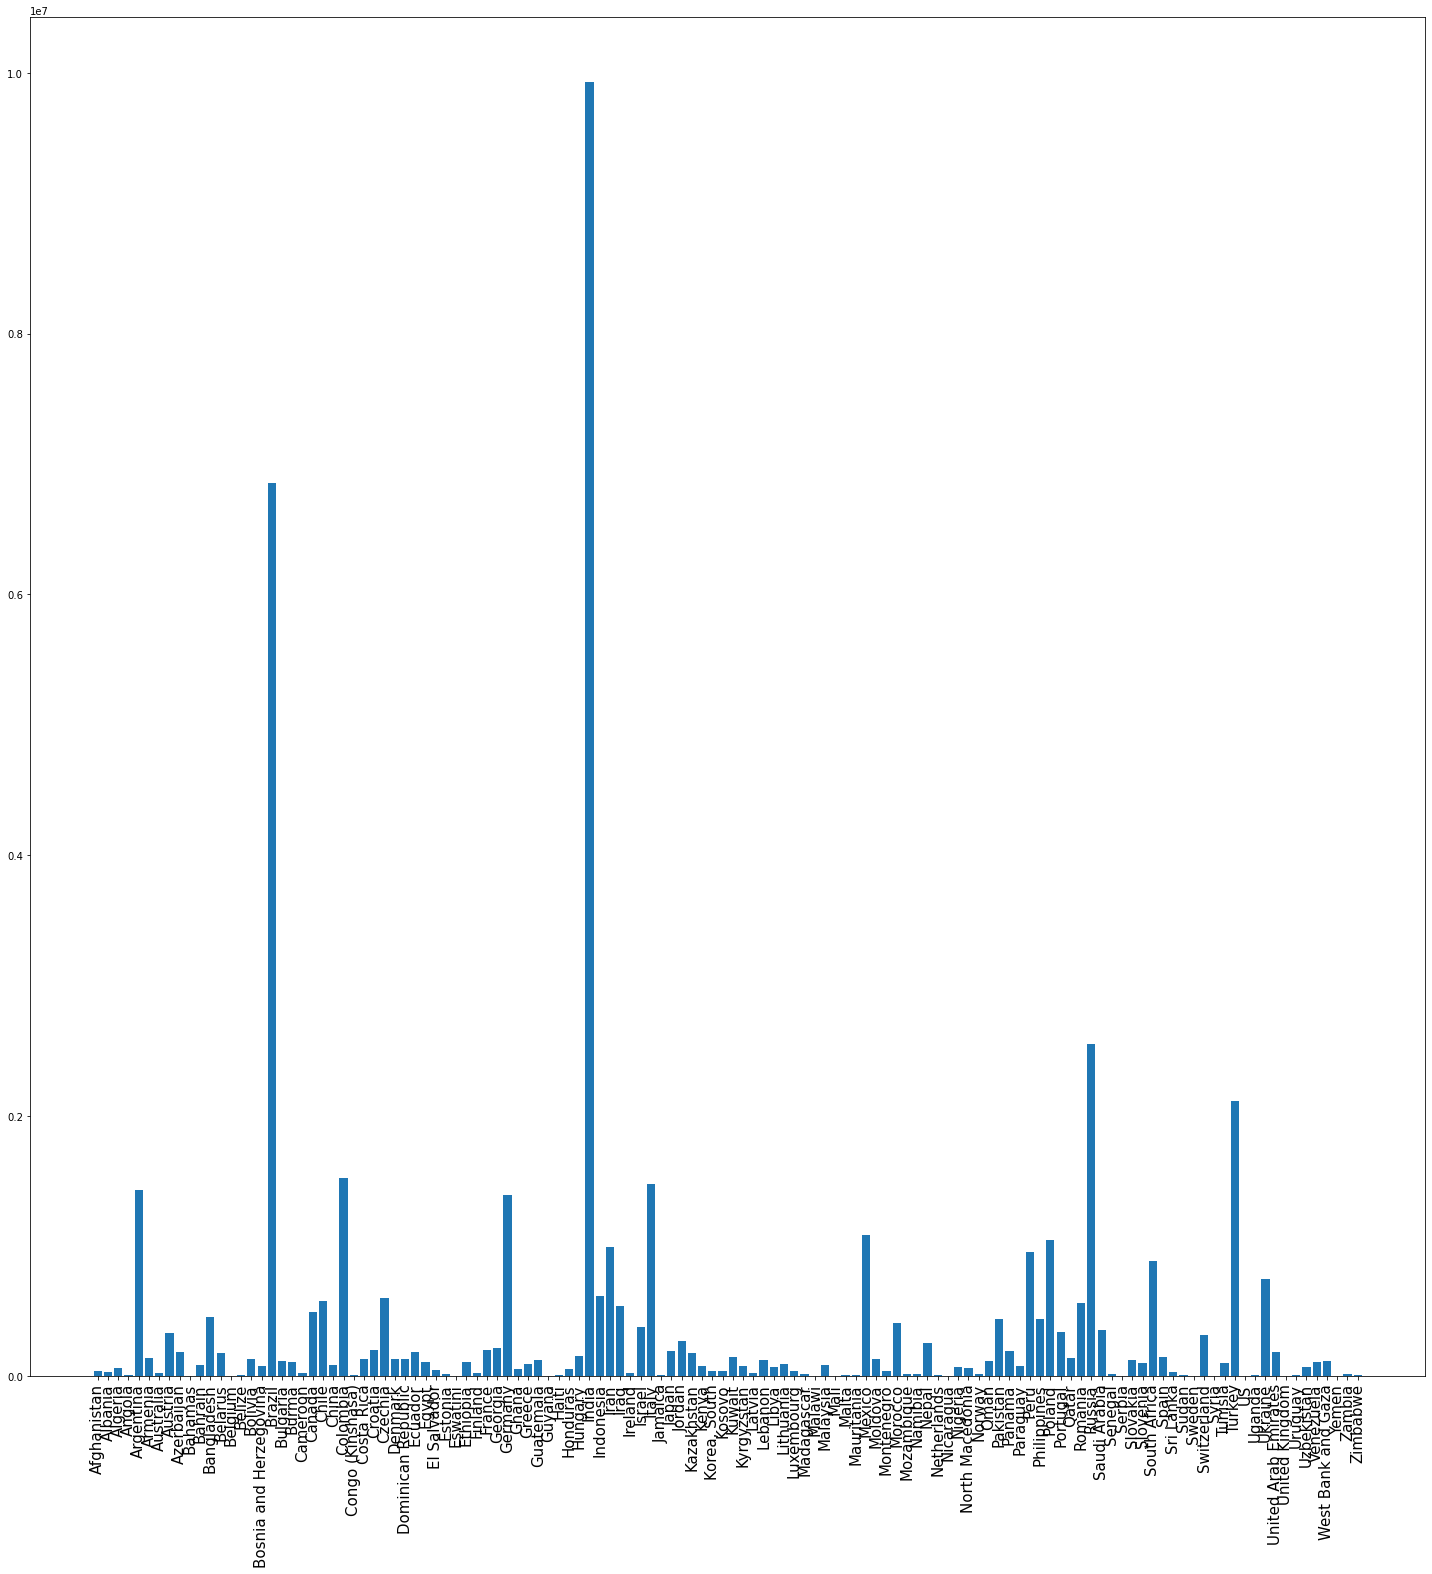

In [233]:
s3=[]

p=0
sums_per_country3=[]
transposed_sums_per_country3=[]

#print(countries_deaths[0])
#print(countries_deaths[0][0])
#print(countries_deaths[0][1])
for i in range(len(countries)):
    
    
    sums_per_country3.append(s3)
    s3=0
    for j in range (len(countries_recovered)):
        #print(j)
        
        if countries[i]==countries_recovered[j][0]:
            
            s3=s3+(countries_recovered[j][1])
sums_per_country3.append(s3)
print("recovered_sums_per_country length is",len(sums_per_country3))
print("countries",len(countries))
print("sums_per_country3_before pop",sums_per_country3)
print("sums_per_country3_before pop",len(sums_per_country3))

sums_per_country3.pop(0)
print("sums_per_country3_after pop",len(sums_per_country3))
print("sums_per_country3_after pop",len(sums_per_country3))
final_recovered_per_country_list3=list(zip((countries), (sums_per_country3)))

recovered_countries_above_150_deaths_positions=[]
print("countries_above_150_deaths_positions",countries_above_150_deaths_positions)
for i in countries_above_150_deaths_positions:
    print(sums_per_country3[i])
    recovered_countries_above_150_deaths_positions.append(sums_per_country3[i])
print("recovered_countries_above_150_deaths_positions is: ",recovered_countries_above_150_deaths_positions)

import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
plt.bar(range(len(countries_above_150_deaths)), recovered_countries_above_150_deaths_positions)
plt.xticks(range(len(countries_above_150_deaths)), countries_above_150_deaths, rotation='vertical', fontsize='15')
          
plt.show()

# Find the deaths per country that are above 150 and plot bar diagram

deaths_sums_per_country length is 195
countries 194
[[], 2191, 1181, 2762, 84, 405, 5, 43319, 2828, 909, 6261, 2670, 171, 352, 7576, 7, 1433, 19581, 248, 44, 0, 9175, 4086, 42, 195411, 3, 7604, 85, 2697, 2, 113, 0, 448, 15806, 63, 104, 16660, 4782, 43495, 10, 108, 591, 2185, 138, 3961, 146, 127, 11711, 1322, 13, 61, 0, 2416, 14051, 7687, 1327, 86, 3, 234, 216, 1937, 2, 561, 64892, 64, 124, 2528, 34145, 335, 4881, 0, 4820, 81, 45, 164, 236, 0, 3160, 9667, 29, 149474, 22329, 55337, 12824, 2248, 3356, 74621, 303, 3540, 3851, 2765, 1681, 0, 942, 1336, 936, 1356, 0, 644, 1479, 51, 83, 1487, 39, 1837, 495, 2, 261, 191, 474, 48, 271, 219, 0, 349, 10, 126507, 3004, 3, 1, 684, 7425, 167, 208, 1864, 11624, 25, 165, 106, 1294, 2510, 436, 1499, 10258, 0, 4064, 9, 2262, 93231, 9248, 28956, 6972, 245, 15841, 56798, 94, 0, 5, 0, 0, 59, 17, 6230, 410, 3250, 0, 76, 29, 2250, 2728, 0, 130, 28887, 63, 50837, 208, 1468, 0, 123, 8727, 7704, 717, 7, 90, 21, 64, 0, 68, 127, 4730, 21093, 354299, 265, 19437, 6

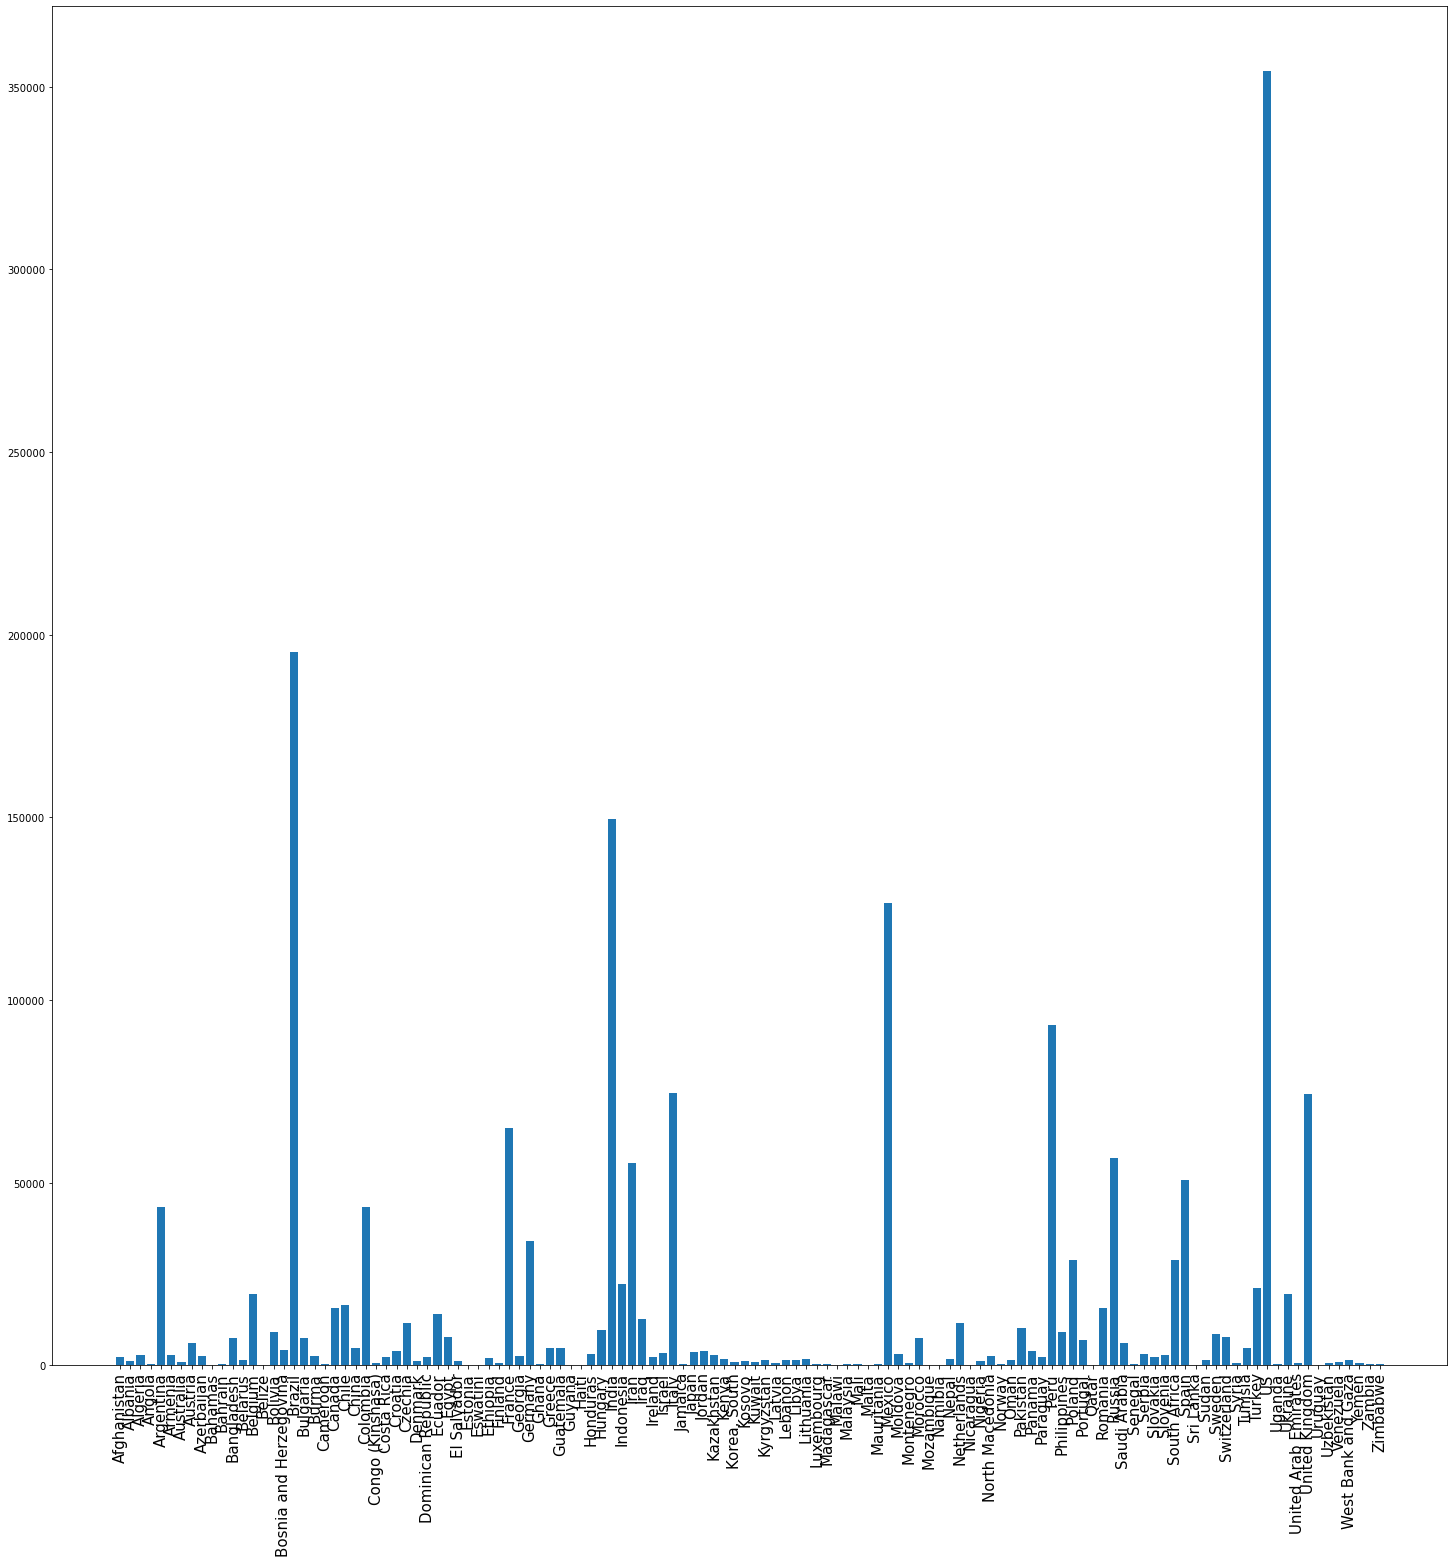

In [234]:
s=[]

sums_per_country=[]
transposed_sums_per_country=[]

for i in range(len(countries)):
    sums_per_country.append(s)
    s=0
    for j in range (len(countries_deaths)):
        
        if countries[i]==countries_deaths[j][0]:
            
            s=s+(countries_deaths[j][1])
sums_per_country.append(s)
print("deaths_sums_per_country length is",len(sums_per_country))
print("countries",len(countries))
print(sums_per_country)

sums_per_country.pop(0)
print("deaths_sums_per_country length is",len(sums_per_country))
print("countries",len(countries))
print(sums_per_country)
final_deaths_per_country_list=list(zip((countries), (sums_per_country)))

deaths_countries_above_150_deaths_positions=[]
print("countries_above_150_deaths_positions",countries_above_150_deaths_positions)
for i in countries_above_150_deaths_positions:
    print(sums_per_country[i])
    deaths_countries_above_150_deaths_positions.append(sums_per_country[i])
print("deaths_countries_above_150_deaths_positions is: ",deaths_countries_above_150_deaths_positions)

import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
plt.bar(range(len(countries_above_150_deaths)), deaths_countries_above_150_deaths_positions)
plt.xticks(range(len(countries_above_150_deaths)), countries_above_150_deaths, rotation='vertical', fontsize='15')
          
plt.show()
